<a href="https://colab.research.google.com/github/Dharshini015/CognoRiseInfoTech/blob/main/Titanic_survival_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#load the dataset
data= pd.read_csv("/content/tested.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Listing all the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Data Wrangling

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
np.round(data['Age'].mean())

30.0

In [8]:
#replace the null values with mean
data['Age'].fillna(np.round(data['Age'].mean()),inplace=True)

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
data['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [11]:
#replace the null values with mode
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [13]:
#replace the null value with median
data['Fare'].fillna(data['Fare'].median(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
#Drop the unwanted columns which doesn't contribute to predict the survival
df=data.drop(['PassengerId','Name','Ticket','Fare','Cabin',],axis=1)

In [16]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S
5,0,3,male,14.0,0,0,S
6,1,3,female,30.0,0,0,Q
7,0,2,male,26.0,1,1,S
8,1,3,female,18.0,0,0,C
9,0,3,male,21.0,2,0,S


###Multi Collinearity

<ipython-input-17-8e93045d8989>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

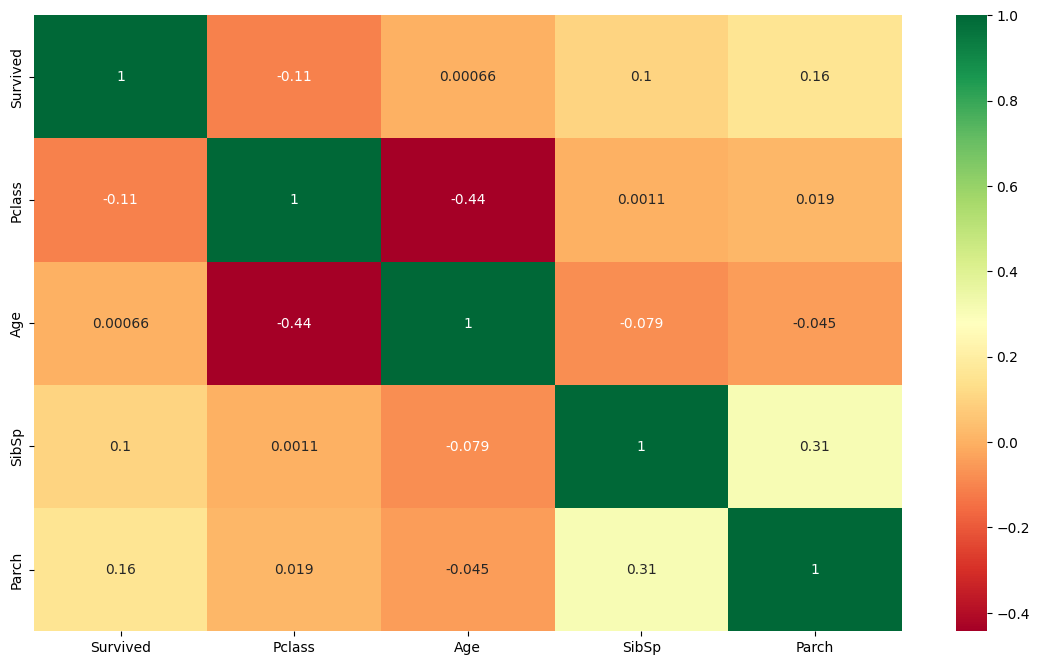

In [17]:
plt.figure(figsize=(14,8))
sn.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='Pclass', ylabel='count'>

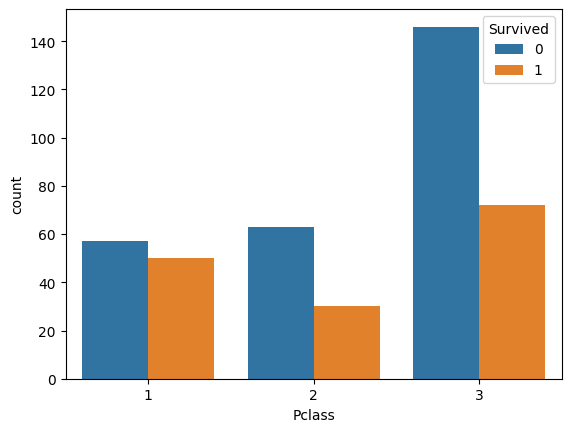

In [18]:
#checking the relationship between survived and pclass
sn.countplot(x='Pclass',hue='Survived',data=df)

In [19]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

###Catagorical values to numerical values

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Display the updated DataFrame
print(df.head())


   Survived  Pclass     Sex   Age  SibSp  Parch  Embarked
0         0       3    male  34.5      0      0         1
1         1       3  female  47.0      1      0         2
2         0       2    male  62.0      0      0         1
3         0       3    male  27.0      0      0         2
4         1       3  female  22.0      1      1         2


In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Display the updated DataFrame
print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0         0       3    1  34.5      0      0         1
1         1       3    0  47.0      1      0         2
2         0       2    1  62.0      0      0         1
3         0       3    1  27.0      0      0         2
4         1       3    0  22.0      1      1         2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [27]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

###Cross Validation

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

###Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(C=10,solver='liblinear')

In [35]:
lg.fit(x_train,y_train)

LogisticRegression(C=10, solver='liblinear')

In [36]:
train_prediction=lg.predict(x_train)
print(train_prediction)

[0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1
 0]


In [37]:
lg.score(x_train,y_train)

1.0

In [33]:
from sklearn.metrics import accuracy_score
prediction=lg.predict(x_test)
acc=accuracy_score(y_test,prediction)
print(acc)

1.0


###Classification Metrics

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
prediction=lg.predict(x_test)

In [40]:
confusion_matrix(y_test,prediction)

array([[45,  0],
       [ 0, 39]])

<Axes: >

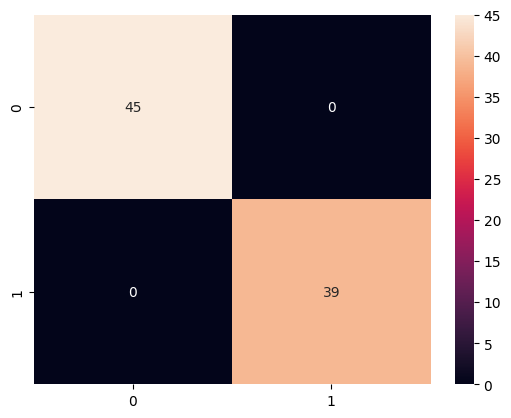

In [41]:
sn.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

